# Imports

In [1]:
import pyxdf
import cv2
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import pingouin as pg 
import seaborn as sns


In [2]:
vid_path = 'C:/Users/Admin/Documents/CurrentStudy/sub-P001/ses-S001/eeg/bryanTest1.avi'

#xdf_path = "C:/Users/Admin/Documents/CurrentStudy/sub-P004/ses-S001/mobi/sub-P004_ses-S001_task-Story_run-001_mobi.xdf"
xdf_path = "/Users/bryan.gonzalez/MOBI2024/CUNY_FACIAL/Data/Pilots/sub-P005_ses-S001_task-Story_run-001_mobi.xdf" 
#xdf_path = xdf_path.replace("\\", "/")
data, header = pyxdf.load_xdf(xdf_path)
streams_collected = [stream['info']['name'][0] for stream in data]
#cam_data = data[1]
#et_dat = data[2]
streams_collected

Stream 2: Calculated effective sampling rate 119.9958 Hz is different from specified rate 90.0000 Hz.
Stream 6: Calculated effective sampling rate 249.9915 Hz is different from specified rate 500.0000 Hz.


['Stimuli_Markers',
 'Tobii',
 'OpenSignals',
 'WebcamStream',
 'EGI NetAmp 0',
 'Audio']

## Note the that first element of every entry of 'time_series' is actually a timestamp.

In [12]:
cam_data['time_series'][0]
frame_nums = [int(i[0]) for i in cam_data['time_series']]
time_pre = [float(i[1]) for i in cam_data['time_series']]
time_evnt_ms = [float(i[2]) for i in cam_data['time_series']]
time_post = [float(i[3]) for i in cam_data['time_series']]


dat = pd.DataFrame({'frame_num': frame_nums, 
                    'time_pre': time_pre, 
                    'cap_time_ms': time_evnt_ms,
                    'time_post': time_post,
                    'lsl_time_stamp': cam_data['time_stamps']/1000})



dat['frame_time_sec'] = (dat.cap_time_ms - dat.cap_time_ms[0])/1000
dat['lsl_time_sec'] = (dat.lsl_time_stamp - dat.lsl_time_stamp[0]) *1000
dat.head()


,frame_num,time_pre,cap_time_ms,time_post,lsl_time_stamp,frame_time_sec,lsl_time_sec
0,1,1.722364e+09,1.537931e+06,1.722364e+09,89.755027,0.000000,0.000000
1,2,1.722364e+09,1.537964e+06,1.722364e+09,89.755060,0.033333,0.033334
2,3,1.722364e+09,1.537997e+06,1.722364e+09,89.755094,0.066667,0.066667
3,4,1.722364e+09,1.538031e+06,1.722364e+09,89.755127,0.100000,0.100001
4,5,1.722364e+09,1.538064e+06,1.722364e+09,89.755160,0.133333,0.133335


<Axes: xlabel='lsl_time_sec', ylabel='frame_time_sec'>

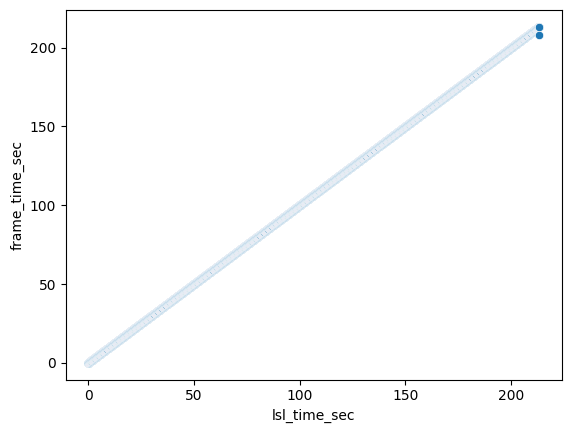

In [12]:
dat['time_delta'] = abs(dat.lsl_time_sec - dat.frame_time_sec)
dat.tail()

,frame_num,time_pre,cap_time_ms,time_post,lsl_time_stamp,frame_time_sec,lsl_time_sec,time_delta
638,639,1.721850e+09,2.516324e+09,1.721850e+09,3207.106826,21.366667,21.372115,0.005448
639,640,1.721850e+09,2.516324e+09,1.721850e+09,3207.106859,21.400000,21.405614,0.005614
640,641,1.721850e+09,2.516324e+09,1.721850e+09,3207.106893,21.433333,21.439112,0.005779
641,642,1.721850e+09,2.516324e+09,1.721850e+09,3207.106926,21.466667,21.472611,0.005944
642,493,1.721850e+09,2.516319e+09,1.721850e+09,3207.106960,16.400000,21.506109,5.106109


# TESTING THE EFFECT OF LUMINANCE ON PUPILOMETRY  - 6.25.24. Bryan Nathalia Test


In [4]:
xdf_path = 'C:/Users/Admin/Documents/CurrentStudy/sub-P001/ses-S001/eyetracking/sub-P001_ses-S001_task-Default_run-001_eyetracking.xdf'

data, header= pyxdf.load_xdf(xdf_path)
streams_collected = [stream['info']['name'][0] for stream in data]
streams_collected

Stream 1: Calculated effective sampling rate 119.9949 Hz is different from specified rate 90.0000 Hz.


['Stimuli_Markers', 'Tobii']

In [4]:
dat = data[0]

In [5]:
len(dat['time_series'])

29460

In [28]:
dat['info']

defaultdict(list,
            {'name': ['Tobii'],
             'type': ['ET'],
             'channel_count': ['31'],
             'channel_format': ['float32'],
             'source_id': ['tobii-prp://TPFC2-010201444964'],
             'nominal_srate': ['90.00000000000000'],
             'version': ['1.100000000000000'],
             'created_at': ['14351.59969880000'],
             'uid': ['96494fd6-be6f-43c7-b93c-3204e64d4f9d'],
             'session_id': ['default'],
             'hostname': ['C3-EYE-TRACKING'],
             'v4address': [None],
             'v4data_port': ['16572'],
             'v4service_port': ['16572'],
             'v6address': [None],
             'v6data_port': ['16572'],
             'v6service_port': ['16572'],
             'desc': [defaultdict(list,
                          {'manufacturer': ['Tobii'],
                           'channels': [defaultdict(list,
                                        {'channel': [defaultdict(list,
                          

## Finding the stimulus markers

In [6]:
print(data[1]['time_series'])
begining = data[1]['time_series'][1]
switch = data[1]['time_series'][3]
end = data[1]['time_series'][5]

[[         1]
 [1719348447]
 [         2]
 [1719348568]
 [         3]
 [1719348688]]


In [7]:

begin_time = data[1]['time_stamps'][1]
switch_time = data[1]['time_stamps'][3]
end_time = data[1]['time_stamps'][5]
print(end_time)
# finding index of that matches these times from the tobii steam


705411.8056110007


In [8]:
ts = np.array([int(x) for x in data[0]['time_stamps']])
np.where(ts== 705412)


(array([29284, 29285, 29286, 29287, 29288, 29289, 29290, 29291, 29292,
        29293, 29294, 29295, 29296, 29297, 29298, 29299, 29300, 29301,
        29302, 29303, 29304, 29305, 29306, 29307, 29308, 29309, 29310,
        29311, 29312, 29313, 29314, 29315, 29316, 29317, 29318, 29319,
        29320, 29321, 29322, 29323, 29324, 29325, 29326, 29327, 29328,
        29329, 29330, 29331, 29332, 29333, 29334, 29335, 29336, 29337,
        29338, 29339, 29340, 29341, 29342, 29343, 29344, 29345, 29346,
        29347, 29348, 29349, 29350, 29351, 29352, 29353, 29354, 29355,
        29356, 29357, 29358, 29359, 29360, 29361, 29362, 29363, 29364,
        29365, 29366, 29367, 29368, 29369, 29370, 29371, 29372, 29373,
        29374, 29375, 29376, 29377, 29378, 29379, 29380, 29381, 29382,
        29383, 29384, 29385, 29386, 29387, 29388, 29389, 29390, 29391,
        29392, 29393, 29394, 29395, 29396, 29397, 29398, 29399, 29400,
        29401, 29402, 29403], dtype=int64),)

In [7]:
#tobii_ts = str.format(data[0]['time_stamps'], '.2f')
#tobii_ts

tobii_begin_time = data[0]['time_stamps'][339] # this is the tobii time stamp corresponding to the stimulus begin time
tobii_switch_time = data[0]['time_stamps'][14884]
tobii_end_time = data[0]['time_stamps'][29284]

In [8]:
gray_half = dat['time_series'][339:14884]
green_half = dat['time_series'][14884:29284]

In [9]:
# Get the column names
column_labels = [dat['info']['desc'][0]['channels'][0]['channel'][i]['label'][0] for i in range(len(dat['info']['desc'][0]['channels'][0]['channel']))]

gray_df = pd.DataFrame(data=gray_half, columns=column_labels)
green_df = pd.DataFrame(data=green_half, columns=column_labels)

In [10]:
# removing first and last 10 secs
gray_half = gray_df[1200:]
gray_half = gray_df[:-1200].dropna()

green_half = green_df[1200:]
green_half = green_df[:-1200].dropna() # remove eye blinks



In [11]:
sum([sum(green_half.isna()[col]) for col in column_labels])

0

In [12]:
left_gray = gray_half['left_pupil_diameter'] 
left_green = green_half['left_pupil_diameter'] 
right_gray = gray_half['right_pupil_diameter'] 
right_green = green_half['right_pupil_diameter'] 

In [13]:
#making gray and green the same size by shortening gray
left_gray = left_gray[:len(left_green)]
right_gray = right_gray[:len(right_green)]

## Left eye

In [14]:
left_green = pd.DataFrame(left_green)
left_green['color'] = 'green'
left_gray = pd.DataFrame(left_gray)
left_gray['color'] = 'gray'

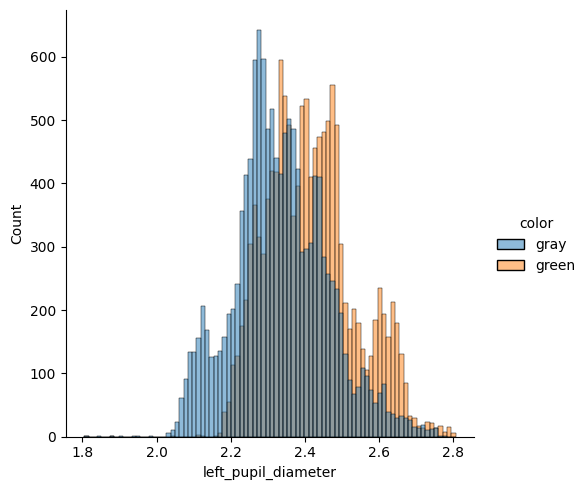

In [31]:


left = pd.concat([left_gray, left_green], )
left_o = left.loc[left.left_pupil_diameter > 1.8]
sns.displot(data=left_o, hue='color', x='left_pupil_diameter')

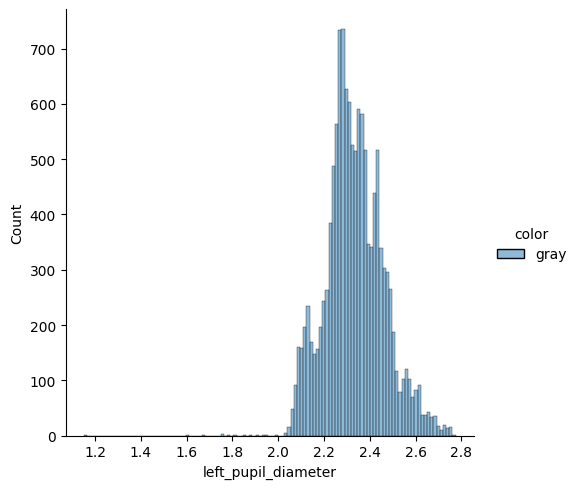

In [30]:
sns.displot(data=left.loc[left.color=='gray'], hue='color', x='left_pupil_diameter')

In [32]:
from scipy import stats

before = left_o.loc[left_o.color == 'gray'].left_pupil_diameter.values
after =  left_o.loc[left_o.color == 'green'].left_pupil_diameter.values
t_stat, p_val = stats.ttest_rel(before, after)
print(t_stat)
print(f'p value:{p_val:.10}')

ValueError: unequal length arrays

In [27]:
left.describe()


,left_pupil_diameter
count,26072.000000
mean,2.375584
std,0.131155
min,1.152527
25%,2.284344
50%,2.365204
75%,2.458744
max,2.806229


In [15]:
pg.ttest(left_gray['left_pupil_diameter'], left_green['left_pupil_diameter'], paired=True)

c:\Python311\Lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-59.275182,13035,two-sided,0.0,"[-0.09, -0.08]",0.670255,inf,1.0


NameError: name 'sns' is not defined

# paired ttest

In [17]:
l_gray = left_gray.rename(columns={'left_pupil_diameter':'gray_left_pupil_diameter' })
l_green = left_green.rename(columns={'left_pupil_diameter':'green_left_pupil_diameter' })

pleft = pd.concat([l_gray, l_green], axis=1)
pleft

,gray_left_pupil_diameter,color,green_left_pupil_diameter,color
0,2.699326,gray,2.436554,green
1,2.693115,gray,2.447052,green
2,2.693832,gray,2.449341,green
3,2.696716,gray,2.440491,green
4,2.698532,gray,2.453903,green
...,...,...,...,...
13615,NaN,NaN,3.241898,green
13616,NaN,NaN,3.197464,green
13617,NaN,NaN,3.251907,green
13618,NaN,NaN,3.276917,green


In [22]:
left_diffs = left_gray['left_pupil_diameter'] - left_green['left_pupil_diameter']
pg.ttest(left_diffs, paired=False)

TypeError: ttest() missing 1 required positional argument: 'y'

## Right eye    

In [21]:
right_green = pd.DataFrame(right_green)
right_green['color'] = 'green'
right_gray = pd.DataFrame(right_gray)
right_gray['color'] = 'gray'

right = pd.concat([right_gray, right_green], )

In [22]:
pg.ttest(right_gray['right_pupil_diameter'], right_green['right_pupil_diameter'], paired=False)


c:\Python311\Lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-79.314407,26070,two-sided,0.0,"[-0.14, -0.13]",0.982415,inf,1.0


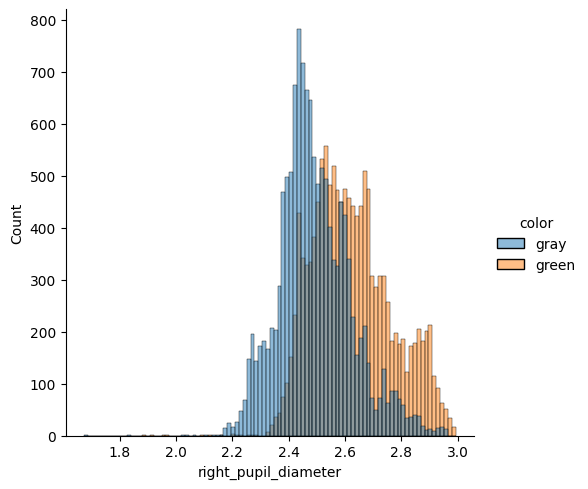

In [23]:
sns.displot(data=right, hue='color', x='right_pupil_diameter')

In [20]:
right.describe()

,right_pupil_diameter
count,31406.000000
mean,2.827009
std,0.317837
min,1.659378
25%,2.598282
50%,2.760986
75%,2.956650
max,3.850403


In [21]:
left.describe()

,left_pupil_diameter
count,31406.000000
mean,2.724874
std,0.312403
min,1.530197
25%,2.492779
50%,2.651367
75%,2.864475
max,3.969498


# Looking EEG noise

In [3]:
data[4]['info']

defaultdict(list,
            {'name': ['EGI NetAmp 0'],
             'type': ['EEG'],
             'channel_count': ['128'],
             'nominal_srate': ['500'],
             'channel_format': ['float32'],
             'source_id': ['EGI NetAmp 0at_10.10.10.51'],
             'version': ['1.1000000000000001'],
             'created_at': ['337273.97564179997'],
             'uid': ['bacb2599-87e5-410e-a1b2-380ebf8131af'],
             'session_id': ['default'],
             'hostname': ['C5-LSL'],
             'v4address': [None],
             'v4data_port': ['16572'],
             'v4service_port': ['16572'],
             'v6address': [None],
             'v6data_port': ['16572'],
             'v6service_port': ['16572'],
             'desc': [defaultdict(list,
                          {'acquisition': [defaultdict(list,
                                        {'manufacturer': ['Philips Neuro'],
                                         'model': ['NetAmp'],
                          

In [4]:
eegdat = pd.DataFrame(data[4]['time_series'])
eegdat

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,3111.602539,-4919.230469,-12673.399414,-177.226334,-13476.124023,1595.613770,-2738.809082,-4785.806152,-9158.535156,-12715.092773,...,-259990.875000,-7144.347168,-6856.099609,1121.514038,7741.416016,-3376.795410,3041.013184,17175.539062,11248.530273,5754.525879
1,3100.609863,-4926.815918,-12686.457031,-184.799225,-13481.799805,1592.806152,-2740.814453,-4802.803711,-9170.872070,-12725.352539,...,-259567.484375,-7157.041504,-6864.524414,1109.120117,7737.267090,-3383.128418,3027.032959,17143.839844,11242.584961,5742.694824
2,3087.848145,-4938.138184,-12691.693359,-193.595871,-13486.737305,1586.721436,-2753.345215,-4813.504883,-9190.372070,-12733.254883,...,-259254.125000,-7163.492676,-6874.054688,1101.042969,7732.485352,-3390.474121,3020.381348,17144.892578,11233.549805,5735.035645
3,3106.762207,-4930.525879,-12682.492188,-186.424072,-13483.956055,1590.033936,-2748.610352,-4794.699219,-9172.663086,-12724.388672,...,-259682.406250,-7146.963379,-6846.547363,1123.363037,7739.368164,-3382.999268,3037.146973,17174.013672,11242.800781,5750.650391
4,3116.983643,-4928.929199,-12688.011719,-183.655563,-13481.836914,1590.981323,-2743.405518,-4789.454102,-9166.307617,-12728.283203,...,-260096.078125,-7144.000977,-6839.720215,1121.995239,7738.468750,-3381.217285,3039.968262,17172.767578,11245.333984,5754.202637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367643,5530.217285,-2432.295166,-7864.809570,6889.952637,-8186.694824,9421.683594,1240.347168,-4441.563965,-5091.356934,-8095.155273,...,318934.125000,-3291.710938,-4254.750000,15801.116211,12688.683594,591.502197,7040.681641,20155.533203,12692.101562,11273.746094
367644,5537.880859,-2470.771240,-7882.702637,6870.958984,-8204.567383,9406.874023,1233.125000,-4484.887207,-5117.158203,-8115.589355,...,318934.125000,-3370.677246,-4253.212891,15787.945312,12698.341797,569.615479,6979.292480,20076.285156,12560.932617,11196.872070
367645,5602.964355,-2399.591064,-7856.372070,6882.461426,-8198.009766,9411.781250,1208.844849,-4457.919434,-5076.900879,-8084.043945,...,318934.125000,-3290.181885,-4158.697754,15789.353516,12655.217773,571.347717,7024.584473,20084.031250,12504.648438,11261.712891
367646,5589.972168,-2394.707764,-7838.686035,6879.360840,-8199.111328,9426.987305,1220.172852,-4400.616211,-5048.543945,-8062.348633,...,318934.125000,-3274.523193,-4188.943848,15775.611328,12607.265625,563.908936,7062.140625,20172.103516,12671.171875,11239.351562


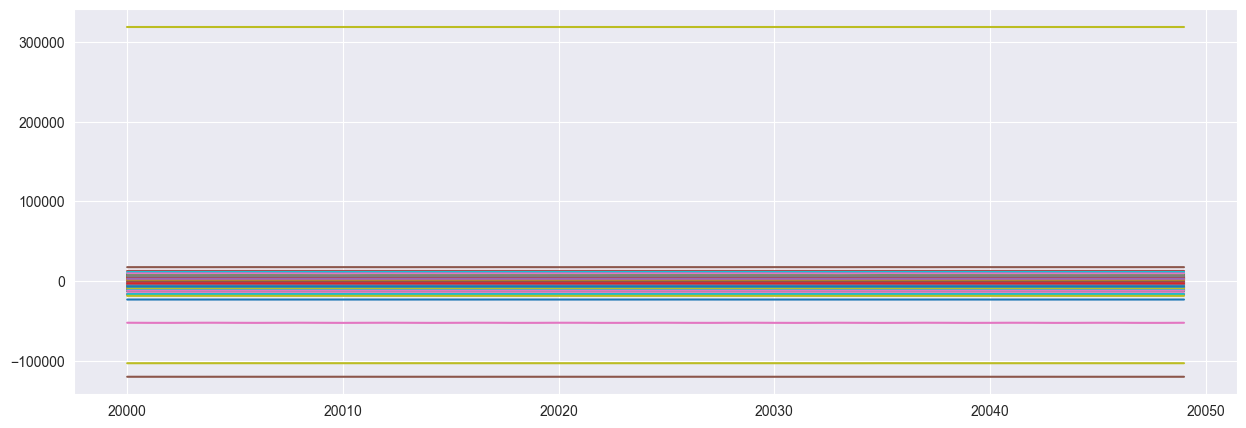

In [10]:
# Plot all columns as separate lines
plt.figure(figsize=(15, 5))
for column in eegdat.columns:
    plt.plot(eegdat[column][20000:20050], label=column)

/var/folders/xf/yrxhv1td653c13cnbnjmybcr0000gq/T/ipykernel_19205/1218563049.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 *np.log10(Sxx), shading='nearest')


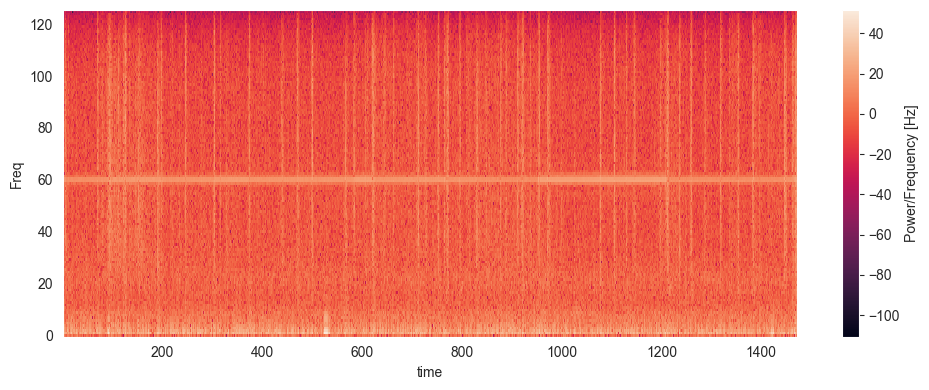

In [11]:
from scipy.signal import spectrogram

plt.figure(figsize=(10, 4))

for column in eegdat.columns:
    f, t, Sxx = spectrogram(eegdat[column], fs=250)

    plt.pcolormesh(t, f, 10 *np.log10(Sxx), shading='nearest')

plt.colorbar(label='Power/Frequency [Hz]')
plt.ylabel('Freq')
plt.xlabel('time')
plt.tight_layout()
plt.show()

In [16]:
# apply a notch filter to remove 60 Hz noise
from scipy.signal import iirnotch, filtfilt

def apply_notch_filter(data, fs, freq=60.0, quality_factor=60.0):
    """
    Apply a notch filter to the data to remove the specified frequency.

    Parameters:
    data (pd.DataFrame): The EEG data where each column is an electrode.
    fs (float): The sampling frequency of the data.
    freq (float): The frequency to be removed by the notch filter (default is 60Hz).
    quality_factor (float): The quality factor of the notch filter (default is 30).

    Returns:
    pd.DataFrame: The filtered EEG data.
    """
    # Design notch filter
    b, a = iirnotch(w0=freq/(fs/2), Q=quality_factor)
    
    # Apply the filter to each column (each electrode)
    filtered_data = data.apply(lambda x: filtfilt(b, a, x), axis=0)
    
    return filtered_data

filtered_data = apply_notch_filter(eegdat, fs=250)




/var/folders/xf/yrxhv1td653c13cnbnjmybcr0000gq/T/ipykernel_19205/3739852496.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 *np.log10(Sxx), shading='nearest')


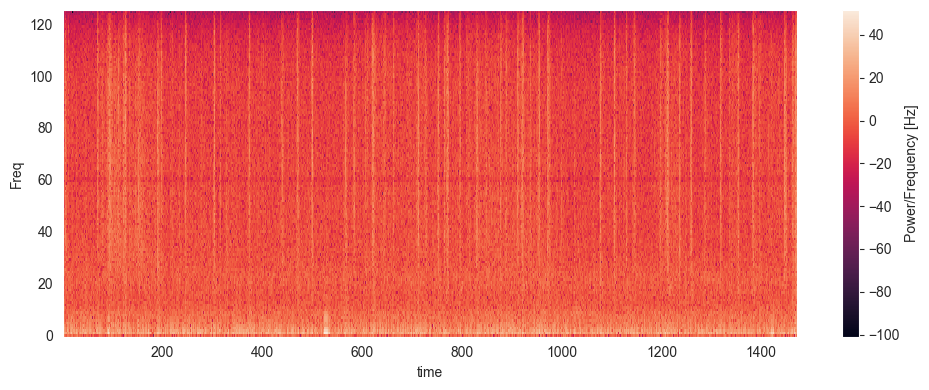

In [17]:

plt.figure(figsize=(10, 4))

for column in filtered_data.columns:
    f, t, Sxx = spectrogram(filtered_data[column], fs=250)

    plt.pcolormesh(t, f, 10 *np.log10(Sxx), shading='nearest')

plt.colorbar(label='Power/Frequency [Hz]')
plt.ylabel('Freq')
plt.xlabel('time')
plt.tight_layout()
plt.show()

# Eye tracking data


In [18]:
ET = data[1]
et_dat = ET['time_series']
# Get the column names
column_labels = [ET['info']['desc'][0]['channels'][0]['channel'][i]['label'][0] for i in range(len(ET['info']['desc'][0]['channels'][0]['channel']))]

et_df = pd.DataFrame(data=et_dat, columns=column_labels)
et_df.head()

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_coordinate_system_0,left_gaze_origin_in_user_coordinate_system_1,left_gaze_origin_in_user_coordinate_system_2,right_gaze_origin_in_user_coordinate_system_0,right_gaze_origin_in_user_coordinate_system_1,right_gaze_origin_in_user_coordinate_system_2,left_gaze_origin_in_trackbox_coordinate_system_0,...,right_gaze_point_in_user_coordinate_system_1,right_gaze_point_in_user_coordinate_system_2,left_gaze_point_on_display_area_0,left_gaze_point_on_display_area_1,right_gaze_point_on_display_area_0,right_gaze_point_on_display_area_1,left_pupil_validity,right_pupil_validity,left_pupil_diameter,right_pupil_diameter
0,5.075650e+09,1.0,1.0,-0.142885,-12.420599,827.710876,64.017754,-16.854828,825.632690,0.498261,...,143.930176,41.744545,0.569044,0.488696,0.546603,0.492924,1.0,1.0,3.466476,3.792145
1,5.075658e+09,1.0,1.0,-0.154891,-12.404822,827.691528,64.003029,-16.845776,825.616394,0.498282,...,149.201279,43.663067,0.575390,0.493002,0.543171,0.473243,1.0,1.0,3.432938,3.773819
2,5.075666e+09,1.0,1.0,-0.167592,-12.408010,827.691772,63.991760,-16.848257,825.656372,0.498303,...,147.670395,43.105892,0.569632,0.496505,0.540590,0.478959,1.0,1.0,3.475388,3.748901
3,5.075675e+09,1.0,1.0,-0.179663,-12.403188,827.672607,63.978416,-16.849213,825.677979,0.498323,...,147.420044,43.014797,0.569970,0.512151,0.543119,0.479894,1.0,1.0,3.466644,3.726669
4,5.075683e+09,1.0,1.0,-0.192492,-12.383987,827.635132,63.969410,-16.836155,825.736633,0.498345,...,146.697540,42.751747,0.571883,0.504511,0.544516,0.482591,1.0,1.0,3.398331,3.737900


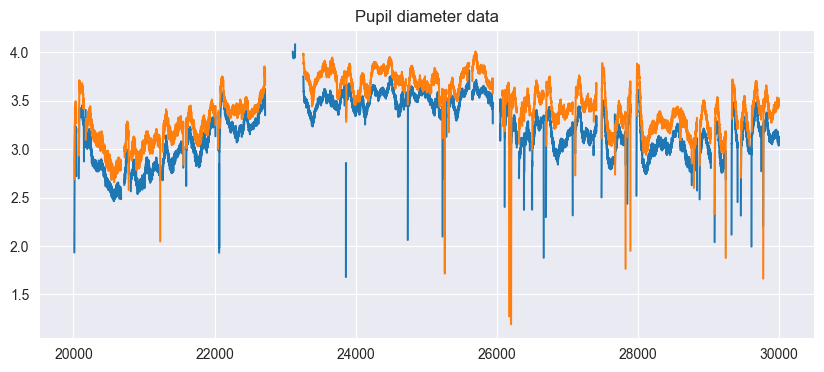

In [19]:
# Plot left_pupil_diameter and right_pupil_diameter
plt.figure(figsize=(10, 4))
plt.plot(et_df['left_pupil_diameter'][20000:30000], label='left_pupil_diameter');
plt.plot(et_df['right_pupil_diameter'][20000:30000], label='right_pupil_diameter');
plt.title('Pupil diameter data');


# Physio data

In [20]:
PS = data[2]
ps_dat = PS['time_series']
# Get the column names
column_labels = [PS['info']['desc'][0]['channels'][0]['channel'][i]['label'][0] for i in range(len(PS['info']['desc'][0]['channels'][0]['channel']))]
ps_df = pd.DataFrame(data=ps_dat, columns=column_labels)
ps_df

,nSeq,RESPIRATION0,ECG1,EDA2,fSpO23,fSpO24,%SpO25
0,4062900.0,0.19116,0.01671,8.8829,0.90615,0.87513,96.0
1,4062901.0,0.19153,0.01743,8.8825,0.90615,0.87513,96.0
2,4062902.0,0.19153,0.01873,8.8844,0.90502,0.87497,96.0
3,4062903.0,0.19135,0.02102,8.8821,0.90502,0.87497,96.0
4,4062904.0,0.19135,0.01788,8.8860,0.90677,0.87499,96.0
...,...,...,...,...,...,...,...
1469819,5532719.0,0.42151,-0.05193,7.1487,0.87327,0.87733,79.0
1469820,5532720.0,0.42041,-0.06056,7.1495,0.87318,0.87737,79.0
1469821,5532721.0,0.41895,-0.06837,7.1480,0.87318,0.87737,79.0
1469822,5532722.0,0.41730,-0.06343,7.1457,0.87319,0.87735,79.0


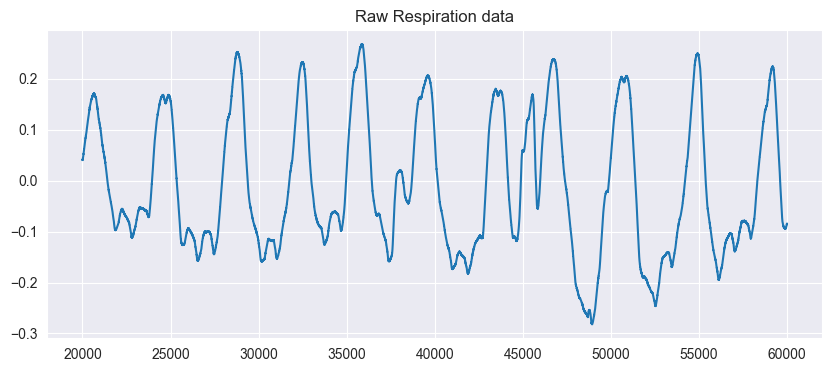

In [21]:
# Plot respiratory and cardiac data
plt.figure(figsize=(10, 4))
plt.plot(ps_df['RESPIRATION0'][20000:60000], label='respiratory')
plt.title('Raw Respiration data');


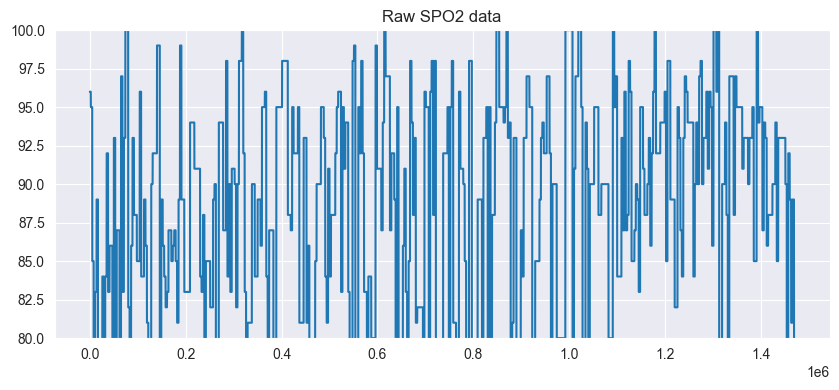

In [28]:
plt.figure(figsize=(10, 4))

plt.plot(ps_df['%SpO25'], label='cardiac')
plt.ylim(80, 100)
plt.title('Raw SPO2 data');

 # Webcam data

In [29]:
cam_data = data[3]
cam_data['time_series'][0]
frame_nums = [int(i[0]) for i in cam_data['time_series']]
time_pre = [float(i[1]) for i in cam_data['time_series']]
time_evnt_ms = [float(i[2]) for i in cam_data['time_series']]
time_post = [float(i[3]) for i in cam_data['time_series']]


cam_df = pd.DataFrame({'frame_num': frame_nums, 
                    'time_pre': time_pre, 
                    'cap_time_ms': time_evnt_ms,
                    'time_post': time_post,
                    'lsl_time_stamp': cam_data['time_stamps']/1000})



cam_df['frame_time_sec'] = (cam_df.cap_time_ms - cam_df.cap_time_ms[0])/1000
cam_df['lsl_time_sec'] = (cam_df.lsl_time_stamp - cam_df.lsl_time_stamp[0]) *1000
cam_df.head()


,frame_num,time_pre,cap_time_ms,time_post,lsl_time_stamp,frame_time_sec,lsl_time_sec
0,1,1.722614e+09,2.512099e+08,1.722614e+09,339.427186,0.000000,0.000000
1,2,1.722614e+09,2.512099e+08,1.722614e+09,339.427219,0.033333,0.033336
2,3,1.722614e+09,2.512100e+08,1.722614e+09,339.427253,0.066667,0.066672
3,4,1.722614e+09,2.512100e+08,1.722614e+09,339.427286,0.100000,0.100008
4,5,1.722614e+09,2.512100e+08,1.722614e+09,339.427319,0.133333,0.133344


<Axes: xlabel='lsl_time_sec', ylabel='frame_time_sec'>

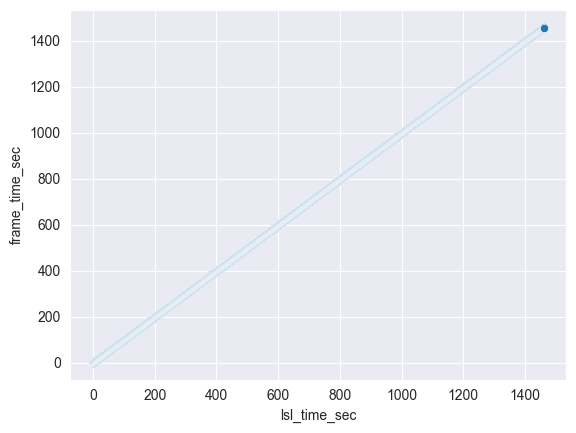

In [30]:
sns.scatterplot(data=cam_df, x='lsl_time_sec', y='frame_time_sec')


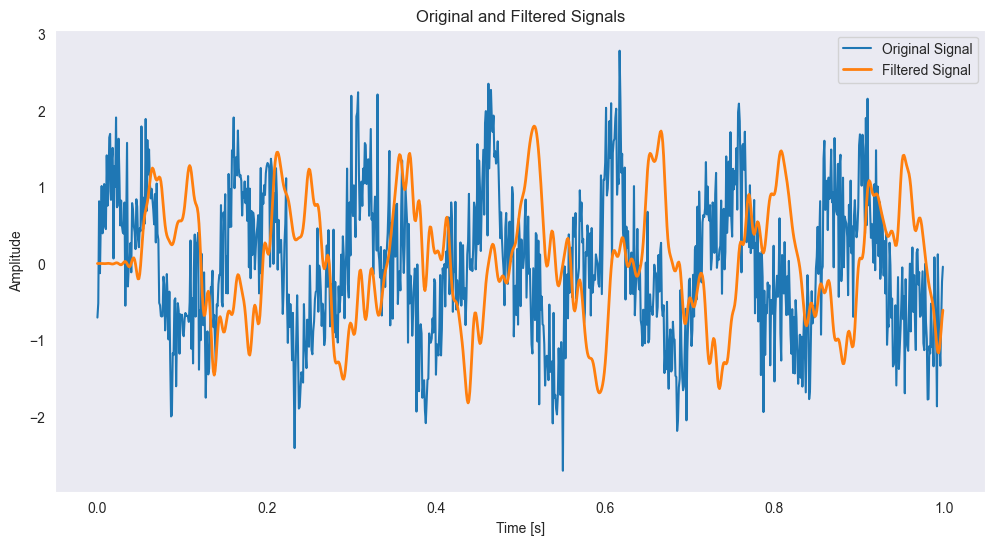

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Sample rate and desired cutoff frequency (Hz)
fs = 1000  # Sampling frequency in Hz
cutoff_freq = 100  # Desired cutoff frequency of the filter in Hz

# Generate a sample time series (e.g., a sine wave with noise)
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 7 * t) + 0.5 * np.sin(2 * np.pi * 20 * t) + np.random.randn(*t.shape) * 0.5

# Design an FIR filter with a given number of taps and cutoff frequency
num_taps = 101  # Number of filter coefficients (taps)
fir_coeff = firwin(num_taps, cutoff_freq, fs=fs)

# Apply the FIR filter to the signal using lfilter
filtered_signal = lfilter(fir_coeff, 1.0, signal)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Original and Filtered Signals')
plt.legend()
plt.grid()
plt.show()